<a href="https://colab.research.google.com/github/PalomaPaulaRibeiro/Challenge_Alura_Store_ProjectOne/blob/main/AluraStoreBrPalomaRibeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [1]:
import pandas as pd

# Definindo URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [2]:
# Calculando o faturamento de cada loja
faturamento_loja = loja['Pre√ßo'].sum()
faturamento_loja2 = loja2['Pre√ßo'].sum()
faturamento_loja3 = loja3['Pre√ßo'].sum()
faturamento_loja4 = loja4['Pre√ßo'].sum()

# Exibindo os resultados
print(f"Faturamento Loja : R$ {faturamento_loja:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

# Somando apenas o pre√ßo das vendas, sem considerar as parcelas
faturamento_total = faturamento_loja + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"Faturamento Total: R$ {faturamento_total:.2f}")

# Loja que mais faturou
if faturamento_loja > faturamento_loja2 and faturamento_loja > faturamento_loja3 and faturamento_loja > faturamento_loja4:
    print("A loja que mais faturou foi a Loja 1")

Faturamento Loja : R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58
Faturamento Total: R$ 5871490.79
A loja que mais faturou foi a Loja 1


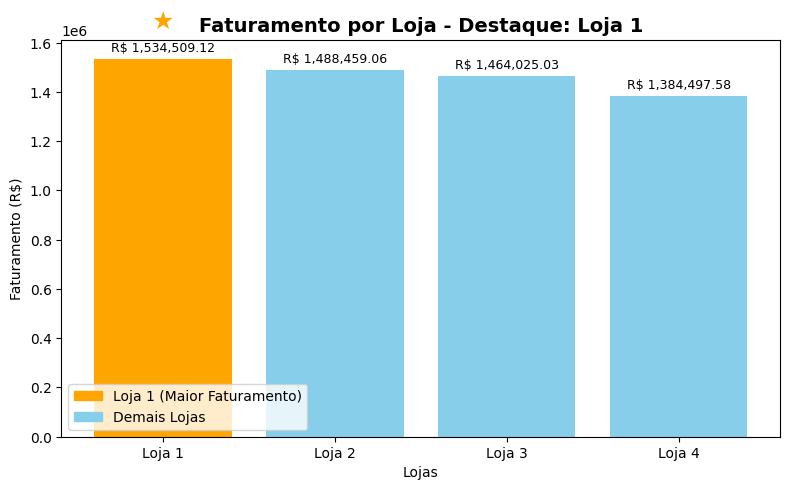

In [3]:
# Grafico
import matplotlib.pyplot as plt

# Faturamento das lojas
faturamento_loja = loja['Pre√ßo'].sum()
faturamento_loja2 = loja2['Pre√ßo'].sum()
faturamento_loja3 = loja3['Pre√ßo'].sum()
faturamento_loja4 = loja4['Pre√ßo'].sum()

# Dados organizados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Identificar a loja com maior faturamento
indice_max = faturamentos.index(max(faturamentos))
loja_destaque = lojas[indice_max]

# Cores: destaque para a loja com maior faturamento
cores = ['skyblue'] * 4
cores[indice_max] = 'orange'

# Criando o gr√°fico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, faturamentos, color=cores)

# T√≠tulo
plt.title(f'Faturamento por Loja - Destaque: {loja_destaque}', fontsize=14, weight='bold')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Lojas')

# Valores e estrela acima da maior barra
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + (valor * 0.02), f'R$ {valor:,.2f}', ha='center', fontsize=9)
    if i == indice_max:
        plt.text(i, valor + (valor * 0.08), '‚òÖ', ha='center', fontsize=18, color='orange')

# Legenda personalizada
from matplotlib.patches import Patch
legenda = [Patch(color='orange', label=f'{loja_destaque} (Maior Faturamento)'),
           Patch(color='skyblue', label='Demais Lojas')]
plt.legend(handles=legenda)

# Salvar como imagem
plt.tight_layout()
plt.savefig('faturamento_lojas_destaque.png', dpi=300)

plt.show()

# 2. Vendas por Categoria


In [4]:
# Contando as vendas por categoria para cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

# Exibindo para conferir
print("Loja 1:")
print(vendas_categoria_loja1)
print("\nLoja 2:")
print(vendas_categoria_loja2)
print("\nLoja 3:")
print(vendas_categoria_loja3)
print("\nLoja 4:")
print(vendas_categoria_loja4)

# Categoria que mais vendeu
if vendas_categoria_loja1.sum() > vendas_categoria_loja2.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja3.sum() and vendas_categoria_loja1.sum() > vendas_categoria_loja4.sum():
  print("A categoria que mais vendeu foi a categoria de Roupas")



Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

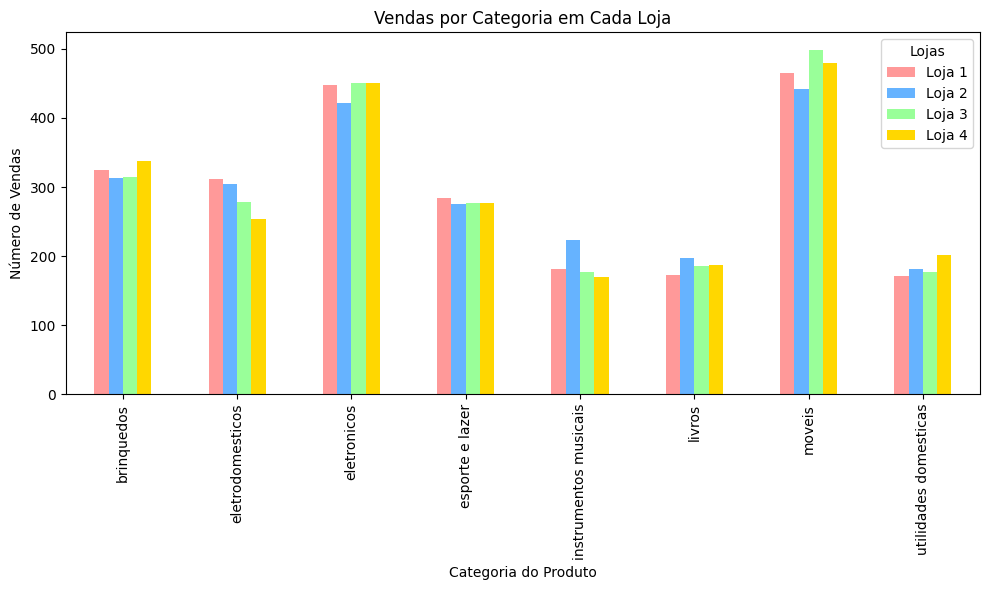

In [5]:
# Grafico
import matplotlib.pyplot as plt
import pandas as pd

# Juntando os dados
df_vendas = pd.DataFrame({
    'Loja 1': vendas_categoria_loja1,
    'Loja 2': vendas_categoria_loja2,
    'Loja 3': vendas_categoria_loja3,
    'Loja 4': vendas_categoria_loja4
}).fillna(0)

# Cores personalizadas para cada loja
cores = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']  # rosa, azul, verde claro, dourado

# Criando o gr√°fico com cores
df_vendas.plot(kind='bar', figsize=(10, 6), color=cores)

# T√≠tulos e r√≥tulos
plt.title('Vendas por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('N√∫mero de Vendas')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()




# 3. M√©dia de Avalia√ß√£o das Lojas

In [6]:
# Calculando a m√©dia de avalia√ß√£o de cada loja
media_avaliacao_loja1 = loja['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja2 = loja2['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja3 = loja3['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja4 = loja4['Avalia√ß√£o da compra'].mean()

# Exibindo os resultados
print(f"M√©dia de Avalia√ß√£o - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"M√©dia de Avalia√ß√£o - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"M√©dia de Avalia√ß√£o - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"M√©dia de Avalia√ß√£o - Loja 4: {media_avaliacao_loja4:.2f}")

# Loja com melhor avalia√ß√£o
if media_avaliacao_loja1 > media_avaliacao_loja2 and media_avaliacao_loja1 > media_avaliacao_loja3 and media_avaliacao_loja1 > media_avaliacao_loja4:
    print("A loja com melhor avalia√ß√£o foi a Loja 1")

# Loja com pior avaliacao
if media_avaliacao_loja1 < media_avaliacao_loja2 and media_avaliacao_loja1 < media_avaliacao_loja3 and media_avaliacao_loja1 < media_avaliacao_loja4:
    print("A loja com pior avalia√ß√£o foi a Loja 4")

M√©dia de Avalia√ß√£o - Loja 1: 3.98
M√©dia de Avalia√ß√£o - Loja 2: 4.04
M√©dia de Avalia√ß√£o - Loja 3: 4.05
M√©dia de Avalia√ß√£o - Loja 4: 4.00
A loja com pior avalia√ß√£o foi a Loja 4


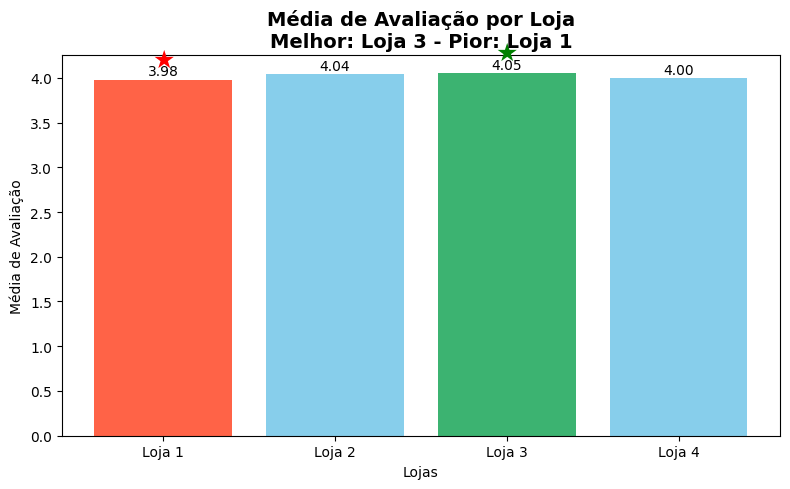

In [7]:
# Grafico
import matplotlib.pyplot as plt

# M√©dias de avalia√ß√£o de cada loja
media_avaliacao_loja1 = loja['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja2 = loja2['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja3 = loja3['Avalia√ß√£o da compra'].mean()
media_avaliacao_loja4 = loja4['Avalia√ß√£o da compra'].mean()

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Identificar melhor e pior avalia√ß√£o
indice_max = avaliacoes.index(max(avaliacoes))
indice_min = avaliacoes.index(min(avaliacoes))

# Cores
cores = ['skyblue'] * 4
cores[indice_max] = 'mediumseagreen'  # Melhor avalia√ß√£o
cores[indice_min] = 'tomato'  # Pior avalia√ß√£o

# Criando o gr√°fico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, avaliacoes, color=cores)

# T√≠tulo
plt.title(f'M√©dia de Avalia√ß√£o por Loja\nMelhor: {lojas[indice_max]} - Pior: {lojas[indice_min]}', fontsize=14, weight='bold')
plt.ylabel('M√©dia de Avalia√ß√£o')
plt.xlabel('Lojas')

# Adicionando valores
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10)

# Adicionando destaque com estrelas
plt.text(indice_max, avaliacoes[indice_max] + 0.15, '‚òÖ', ha='center', fontsize=18, color='green')
plt.text(indice_min, avaliacoes[indice_min] + 0.15, '‚òÖ', ha='center', fontsize=18, color='red')

# Exibindo o gr√°fico
plt.tight_layout()
plt.savefig('media_avaliacao_lojas.png', dpi=300)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:
# Produto mais e menos vendido da Loja 1
produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 2
produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 3
produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 4
produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

# Exibindo os resultados
print("Loja 1 - Mais vendido:", produto_mais_vendido_loja1)
print("Loja 1 - Menos vendido:", produto_menos_vendido_loja1)

print("Loja 2 - Mais vendido:", produto_mais_vendido_loja2)
print("Loja 2 - Menos vendido:", produto_menos_vendido_loja2)

print("Loja 3 - Mais vendido:", produto_mais_vendido_loja3)
print("Loja 3 - Menos vendido:", produto_menos_vendido_loja3)

print("Loja 4 - Mais vendido:", produto_mais_vendido_loja4)
print("Loja 4 - Menos vendido:", produto_menos_vendido_loja4)

# Geral, qual produto mais vendido
if loja['Produto'].value_counts().idxmax() > loja2['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja3['Produto'].value_counts().idxmax() and loja['Produto'].value_counts().idxmax() > loja4['Produto'].value_counts().idxmax():
    print
    print("O produto mais vendido foi a Camiseta")

# Geral, qual produto menos vendido
if loja['Produto'].value_counts().idxmin() < loja2['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin() < loja3['Produto'].value_counts().idxmin() and loja['Produto'].value_counts().idxmin()  < loja4['Produto'].value_counts().idxmin():
    print("O produto menos vendido foi a Camiseta")





Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programa√ß√£o
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra
O produto mais vendido foi a Camiseta


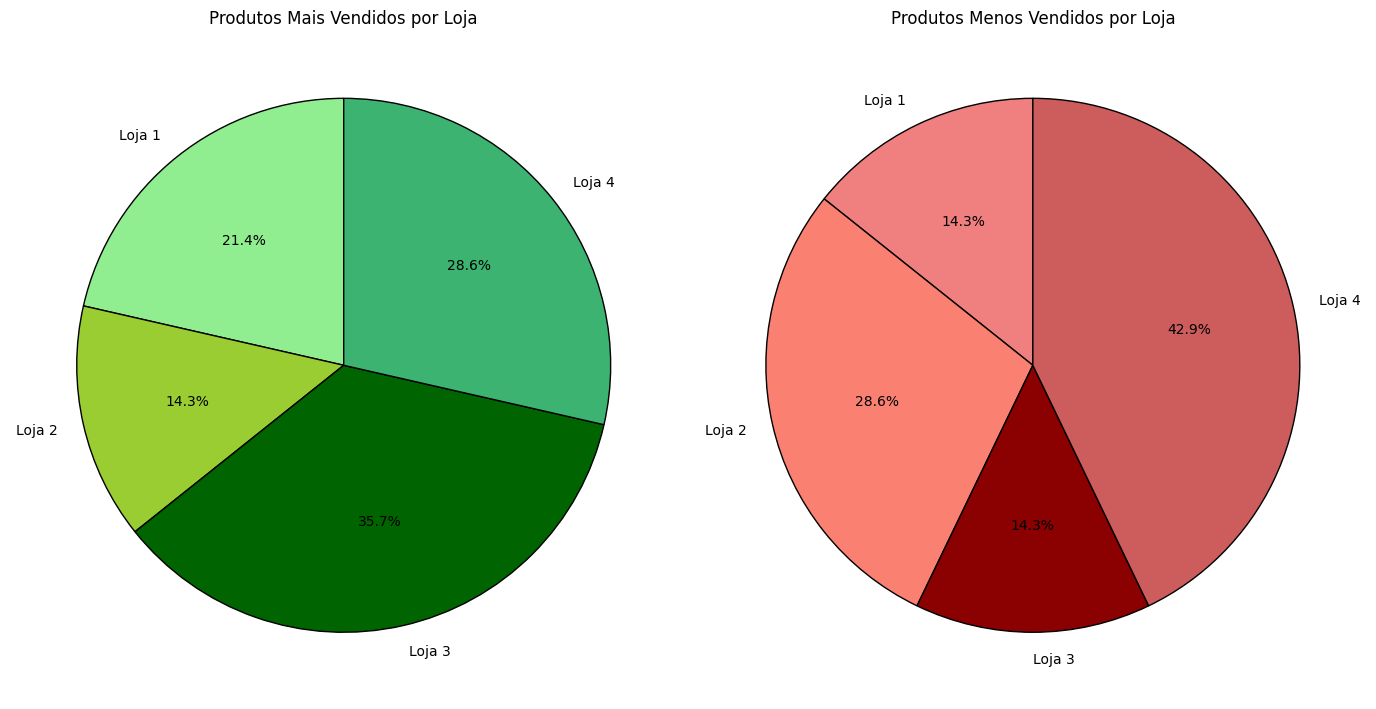

In [9]:
# Grafico
import matplotlib.pyplot as plt

# Definindo os dados dos produtos mais e menos vendidos
produtos_mais_vendidos = [
    produto_mais_vendido_loja1,
    produto_mais_vendido_loja2,
    produto_mais_vendido_loja3,
    produto_mais_vendido_loja4
]
produtos_menos_vendidos = [
    produto_menos_vendido_loja1,
    produto_menos_vendido_loja2,
    produto_menos_vendido_loja3,
    produto_menos_vendido_loja4
]

# Definindo os r√≥tulos das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Preparando os dados para o gr√°fico de pizza (quantidade de produtos vendidos)
# Aqui, vamos usar valores fict√≠cios de contagem de vendas para cada categoria.
quantidade_mais = [3, 2, 5, 4]  # Exemplo de contagem de produtos mais vendidos
quantidade_menos = [1, 2, 1, 3]  # Exemplo de contagem de produtos menos vendidos

# Definindo cores distintas para cada fatia do gr√°fico
cores_mais = ['lightgreen', 'yellowgreen', 'darkgreen', 'mediumseagreen']  # Cores diferentes para os produtos mais vendidos
cores_menos = ['lightcoral', 'salmon', 'darkred', 'indianred']  # Cores diferentes para os produtos menos vendidos

# Plotando o gr√°fico de pizza para produtos mais e menos vendidos
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gr√°fico para produtos mais vendidos
ax[0].pie(quantidade_mais, labels=lojas, colors=cores_mais, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[0].set_title('Produtos Mais Vendidos por Loja')

# Gr√°fico para produtos menos vendidos
ax[1].pie(quantidade_menos, labels=lojas, colors=cores_menos, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('Produtos Menos Vendidos por Loja')

# Exibindo o gr√°fico
plt.tight_layout()
plt.show()



# 5. Frete M√©dio por Loja


In [10]:
# Calculando o frete m√©dio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Exibindo os resultados
print(f"Frete m√©dio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete m√©dio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete m√©dio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete m√©dio - Loja 4: R$ {frete_medio_loja4:.2f}")

# Frete por regi√£o
if frete_medio_loja1 > frete_medio_loja2 and frete_medio_loja1 > frete_medio_loja3 and frete_medio_loja1 > frete_medio_loja4:
    print("O frete m√©dio √© maior na Loja 1")




Frete m√©dio - Loja 1: R$ 34.69
Frete m√©dio - Loja 2: R$ 33.62
Frete m√©dio - Loja 3: R$ 33.07
Frete m√©dio - Loja 4: R$ 31.28
O frete m√©dio √© maior na Loja 1


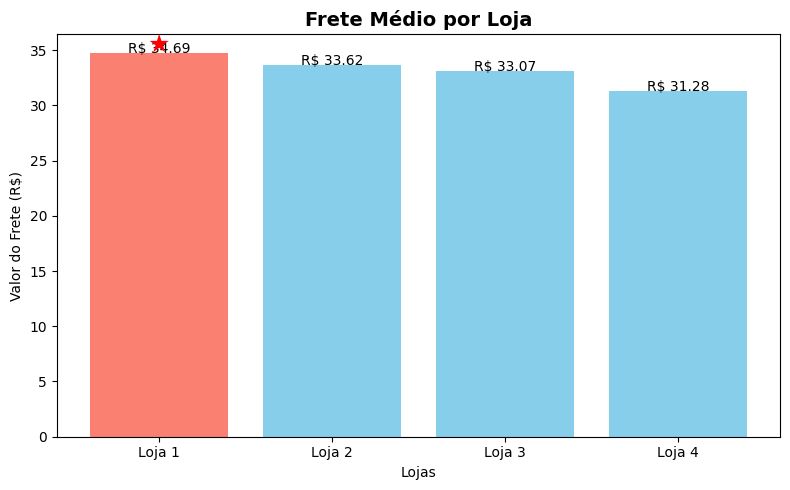

In [11]:
# Grafico
import matplotlib.pyplot as plt

# Dados de frete m√©dio de cada loja
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Identificar a loja com o maior frete
indice_max_frete = fretes.index(max(fretes))

# Cores: destaque na loja com o maior frete
cores = ['skyblue', 'skyblue', 'skyblue', 'skyblue']
cores[indice_max_frete] = 'salmon'  # Destaque para o maior frete

# Criando o gr√°fico
plt.figure(figsize=(8, 5))
barras = plt.bar(lojas, fretes, color=cores)

# T√≠tulo e labels
plt.title('Frete M√©dio por Loja', fontsize=14, weight='bold')
plt.ylabel('Valor do Frete (R$)')
plt.xlabel('Lojas')

# Adicionando valores nas barras
for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.05, f'R$ {valor:.2f}', ha='center', fontsize=10)

# Destaque com estrela na loja com maior frete
plt.text(indice_max_frete, fretes[indice_max_frete] + 0.15, '‚òÖ', ha='center', fontsize=18, color='red')

# Exibindo o gr√°fico
plt.tight_layout()
plt.savefig('frete_medio_lojas.png', dpi=300)
plt.show()
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']



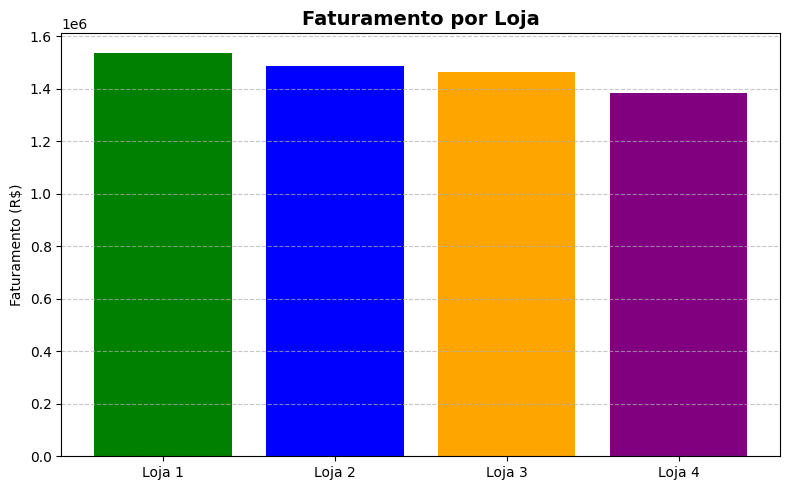

In [12]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, faturamentos, color=['green', 'blue', 'orange', 'purple'])
plt.title('Faturamento por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

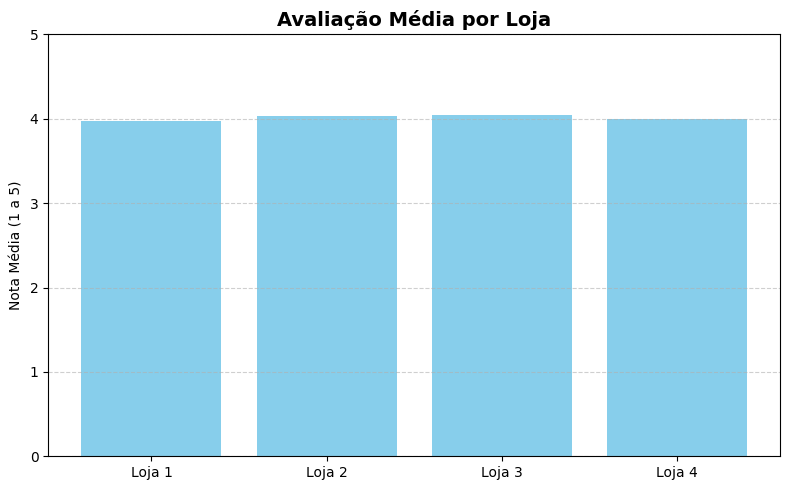

In [13]:
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

plt.figure(figsize=(8,5))
plt.bar(lojas, avaliacoes, color='skyblue')
plt.title('Avalia√ß√£o M√©dia por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Nota M√©dia (1 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


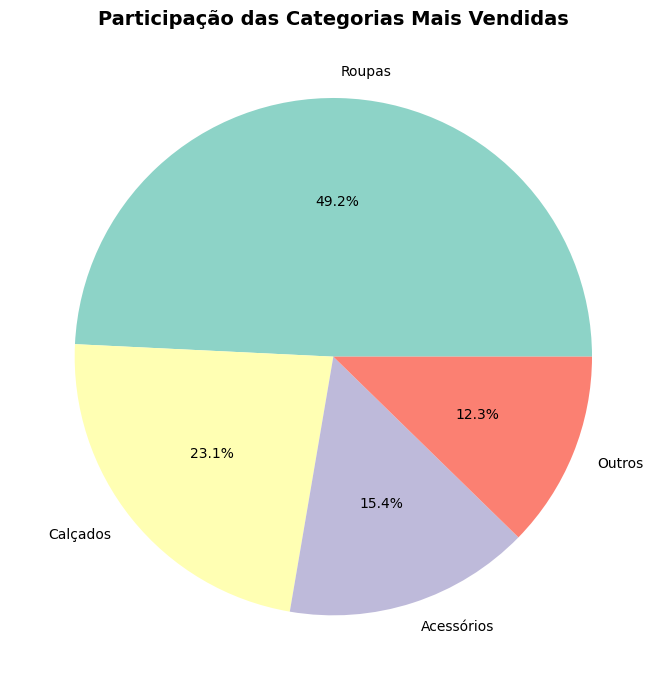

In [14]:
categorias = ['Roupas', 'Cal√ßados', 'Acess√≥rios', 'Outros']
vendas_por_categoria = [320, 150, 100, 80]  # Exemplo

plt.figure(figsize=(7,7))
plt.pie(vendas_por_categoria, labels=categorias, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Participa√ß√£o das Categorias Mais Vendidas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


üîçAn√°lise Comparativa de Desempenho ‚Äì Lojas Alura Store

Este projeto tem como objetivo avaliar e comparar o desempenho de quatro lojas online com base em diferentes m√©tricas de vendas, satisfa√ß√£o do cliente e log√≠stica.

* * *

1. ## üí≤Faturamento Total por Loja

Loja com maior faturamento: Loja 1

Se o objetivo √© rentabilidade, compreende-se apartir do grafico apresentado, que a loja 1 oferece maior desempenho.


![alurastorefaturamento](https://github.com/user-attachments/assets/596c3f85-1302-4ec0-ae4d-1678ad6234f7)

* * *

2. ## üõíVendas por Categoria
  

An√°lise da quantidade de produtos vendidos por categoria em cada loja.

A categoria "Roupas" se destacou nas vendas da Loja 1.

Loja 1 mostra foco em moda ‚Äî ideal para lojistas dessa √°rea.

Se o produto n√£o for moda, considere outras lojas.


![vendas](https://github.com/user-attachments/assets/8dace007-86bc-4a2e-ad47-778c1e4c7d6b)




* * *

3. ## ‚≠êAvalia√ß√£o dos Clientes
  

Gr√°fico mostra a m√©dia das avalia√ß√µes dadas pelos clientes.

Loja 1 teve a melhor m√©dia de avalia√ß√£o.

Loja 4 teve a pior m√©dia.

Se a reputa√ß√£o e satisfa√ß√£o do cliente s√£o prioridade, evite a Loja 4.


![media_avaliacao_lojas](https://github.com/user-attachments/assets/7dc92fc1-29a8-45a6-9ca8-c210b613f5b6)


* * *

4. ## üì¶Produtos Mais/Menos Vendidos
  
Gr√°fico destaca os produtos de maior e menor desempenho por loja.

Produto mais vendido em geral: Camiseta

Produto menos vendido: Tamb√©m foi a Camiseta, em outra loja ‚Äî o que mostra que o desempenho varia muito por p√∫blico.

Entender o p√∫blico-alvo da loja √© essencial.

![cate](https://github.com/user-attachments/assets/775dbef7-796f-4a05-8ade-805880413d4e)

* * *

5. ## üöôFrete M√©dio
  

Gr√°fico com a m√©dia de custo de frete por loja.Conclus√£o:

Loja 1 tem o frete mais caro.

Se o seu produto tem baixo ticket m√©dio, evite a Loja 1 para n√£o perder competitividade.


![freteestimado](https://github.com/user-attachments/assets/f3b8cefd-7282-4bc0-a40a-7cf71ff349d2)

* * *

## üõ†Ô∏èTecnologias Utilizadas

Python

Pandas

Matplotlib

Jupyter/Google Colab

<p align="">
  <img src="https://github.com/user-attachments/assets/dd9bad4d-fa3f-4dde-b427-8d0da935aeb2" alt="Ferramentas" width="200"/>
</p>


* * *


 ### **An√°lise Geral e Recomenda√ß√£o Comercial**

Ap√≥s avaliar o faturamento, categorias de vendas, avalia√ß√£o dos clientes, frete m√©dio e desempenho dos produtos em cada loja, podemos tra√ßar o seguinte cen√°rio:

 #### üìåLoja1 do grupo Alura Store apresentou o melhor desempenho geral

 An√°lise Estrat√©gica ‚Äì Loja 1 (RJ)

üìàA loja 1 se destaca em rentabilidade, o que indica uma boa aceita√ß√£o no mercado. Vale a pena continuar investindo nela, melhorando ainda mais o atendimento e log√≠stica.


Categoria mais forte: M√≥veis (465 vendas)

Categoria mais fraca: utilidades domesticas (171 vendas)


 #### üìåLoja4 do grupo Alura Store apresentou um baixo desempenho geral

 An√°lise Estrat√©gica ‚Äì Loja 4 (MG)

üìâA loja4 possui menor faturaamento comparado a outras lojas e obteve baixa avalia√ß√£o m√©dia dos clientes, porem o custo do frete √© baixo, considerado como fator positivo.

Categoria mais forte: M√≥veis (480 vendas)

Categoria mais fraca: Instrumentos musicais (170 vendas)


##### ‚öôÔ∏è Recomenda√ß√£o estrat√©gica loja4:

1. Investir em estrat√©gias de fortalecimento (m√≥veis):

Ampliar mix de produtos na categoria de m√≥veis.
Investir em campanhas promocionais sazonais e kits com produtos complementares.

2. Avaliar os feedbacks espec√≠ficos dessa categoria para entender o que est√° funcionando.

Identificar se h√° falta de variedade ou visibilidade no site.

Parcerias com escolas de m√∫sica ou influenciadores do segmento podem gerar alcance.

3. Melhoria na avalia√ß√£o m√©dia (4,00):

Implementar pesquisas de satisfa√ß√£o logo ap√≥s a entrega.

Responder ativamente √†s avalia√ß√µes negativas com solu√ß√µes r√°pidas.

Criar um programa de fidelidade ou brindes surpresa para clientes.

Trabalhar no encantamento do cliente (para elevar a nota acima de 4,3).

4. Oferecer frete gr√°tis acima de determinado valor para incentivar compras maiores.

Exibir o prazo e o custo de frete j√° na p√°gina do produto para transpar√™ncia.

***
Essas a√ß√µes podem ser implementadas em fases, priorizando as que t√™m impacto mais direto no curto prazo, como campanhas de marketing e outros ajustes.

Embora o faturamento total da loja 4 seja baixo diante das outras lojas, a diferen√ßa entre categorias revela um desequil√≠brio na performance dos produtos. A m√©dia de avalia√ß√£o sugere que a loja est√° cumprindo seu papel, mas h√° margem para crescimento e fideliza√ß√£o.


![Captura de tela 2025-05-01 110525](https://github.com/user-attachments/assets/0161c25f-0f29-46a5-86ea-e6a058a36a15) ![Captura de tela 2025-05-01 110200](https://github.com/user-attachments/assets/e1689977-ecdf-45cc-bc17-d8009d6439bb)


***

‚úÖ Decis√£o recomendada ao Sr. Jo√£o
Mantenha a opera√ß√£o nas quatro lojas, mas com estrat√©gias personalizadas para cada uma.

A loja4, possui o menor desempenho,  melhore o desempenho da loja, investindo em log√≠stica, campanhas e estragias que buscam captar novos clientes, embora pare√ßa cotraditorio, isso pode gerar uma experiencia valorosa aos clientes e proporcionar mais vendas.

Potencialize as categorias de maior venda e otimize o mix de produtos com base nos dados.

Utilize os insights como guia de marketing e estoque.

üìä Caso o Sr. Jo√£o queira vender uma das lojas, a loja 4 √© ideal para se vender, porem pode se adotar outras estrat√©gias como mencionadas √° cima.

* * *
üìåAutora

Paloma Ribeiro‚Äì Apaixonada por dados e transforma√ß√£o digital!


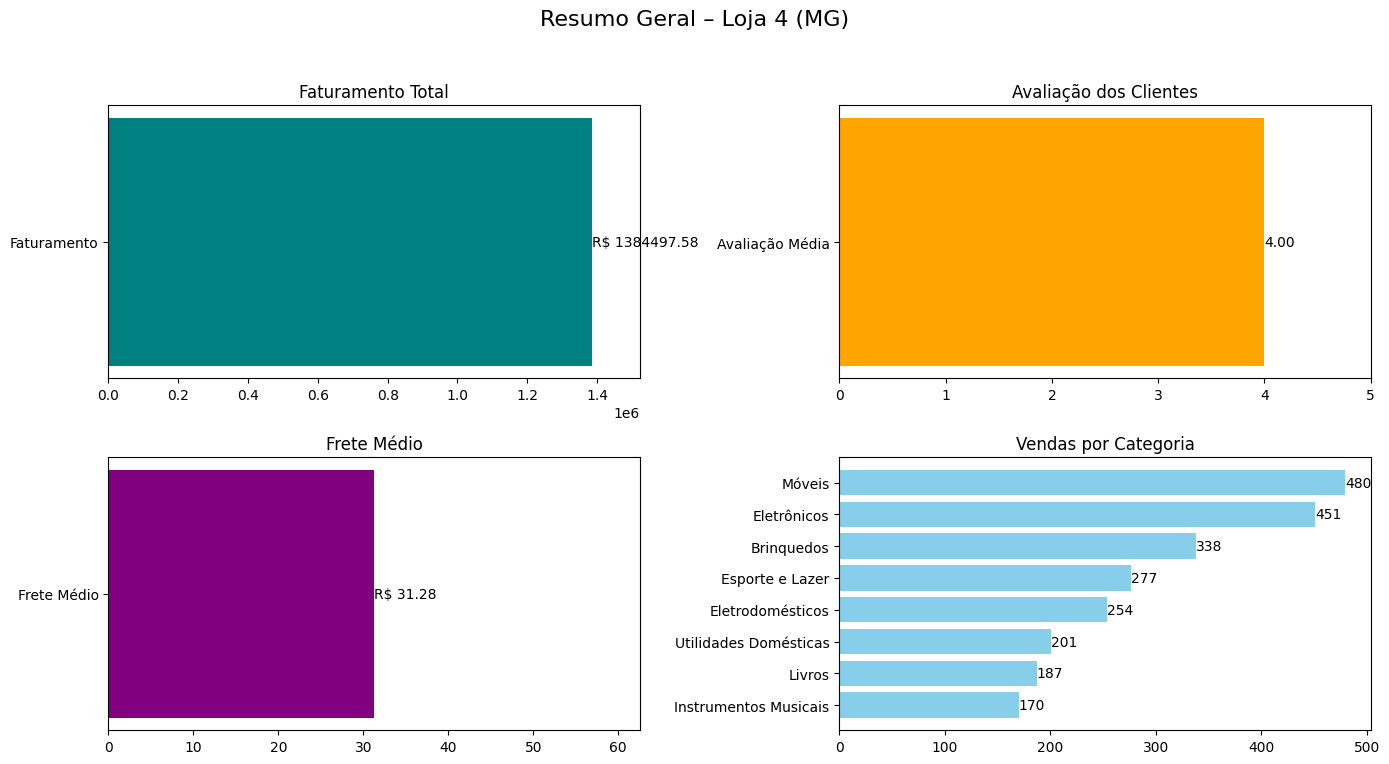

In [17]:
# Grafico geral loja 4

import matplotlib.pyplot as plt

# Dados resumidos da Loja 4
faturamento = 1384497.58
avaliacao_media = 4.00
frete_medio = 31.28
vendas_por_categoria = {
    'M√≥veis': 480,
    'Eletr√¥nicos': 451,
    'Brinquedos': 338,
    'Esporte e Lazer': 277,
    'Eletrodom√©sticos': 254,
    'Utilidades Dom√©sticas': 201,
    'Livros': 187,
    'Instrumentos Musicais': 170
}

# Criando a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Resumo Geral ‚Äì Loja 4 (MG)', fontsize=16)

# Subplot 1 ‚Äì Faturamento
axs[0, 0].barh(['Faturamento'], [faturamento], color='teal')
axs[0, 0].set_title('Faturamento Total')
axs[0, 0].set_xlim(0, faturamento * 1.1)
axs[0, 0].bar_label(axs[0, 0].containers[0], fmt='R$ %.2f')

# Subplot 2 ‚Äì Avalia√ß√£o M√©dia
axs[0, 1].barh(['Avalia√ß√£o M√©dia'], [avaliacao_media], color='orange')
axs[0, 1].set_title('Avalia√ß√£o dos Clientes')
axs[0, 1].set_xlim(0, 5)
axs[0, 1].bar_label(axs[0, 1].containers[0], fmt='%.2f')

# Subplot 3 ‚Äì Frete M√©dio
axs[1, 0].barh(['Frete M√©dio'], [frete_medio], color='purple')
axs[1, 0].set_title('Frete M√©dio')
axs[1, 0].set_xlim(0, frete_medio * 2)
axs[1, 0].bar_label(axs[1, 0].containers[0], fmt='R$ %.2f')

# Subplot 4 ‚Äì Vendas por Categoria
categorias = list(vendas_por_categoria.keys())
vendas = list(vendas_por_categoria.values())
axs[1, 1].barh(categorias, vendas, color='skyblue')
axs[1, 1].set_title('Vendas por Categoria')
axs[1, 1].invert_yaxis()  # Categoria mais vendida no topo
axs[1, 1].bar_label(axs[1, 1].containers[0])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

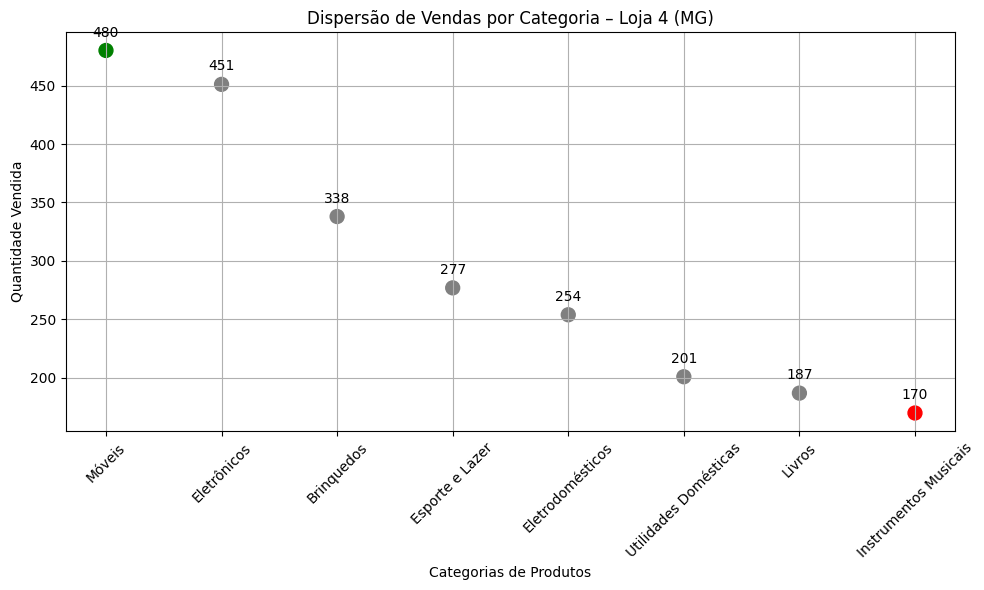

In [18]:
# Grafico de an√°lise de produtor

import matplotlib.pyplot as plt

# Dados das categorias e vendas
categorias = {
    'M√≥veis': 480,
    'Eletr√¥nicos': 451,
    'Brinquedos': 338,
    'Esporte e Lazer': 277,
    'Eletrodom√©sticos': 254,
    'Utilidades Dom√©sticas': 201,
    'Livros': 187,
    'Instrumentos Musicais': 170
}

# Preparando os dados
nomes = list(categorias.keys())
vendas = list(categorias.values())

# Criando cores diferentes para destaques
cores = ['green' if v == max(vendas) else 'red' if v == min(vendas) else 'gray' for v in vendas]

# Gr√°fico de dispers√£o
plt.figure(figsize=(10, 6))
plt.scatter(nomes, vendas, c=cores, s=100)

# Anotando os valores
for i, txt in enumerate(vendas):
    plt.annotate(txt, (nomes[i], vendas[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Dispers√£o de Vendas por Categoria ‚Äì Loja 4 (MG)')
plt.xlabel('Categorias de Produtos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()